# Store Sales Prediction

# Problem Statement

Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.

# Loading the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
train = pd.read_csv('Train.csv')

In [3]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape

(8523, 12)

In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

1) We have two columns with missing values.
i.e. Item_Weight, Outlet_Size.

# Exploratory Data Analysis

In [9]:
numerical_columns = train.select_dtypes(exclude="object").columns.tolist()
print(numerical_columns)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [10]:
categorical_columns = train.select_dtypes(include="object").columns.tolist()
print(categorical_columns)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [11]:
train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [12]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
duplicate = train.duplicated()
duplicate.sum()

0

No duplicates found in our dataset.

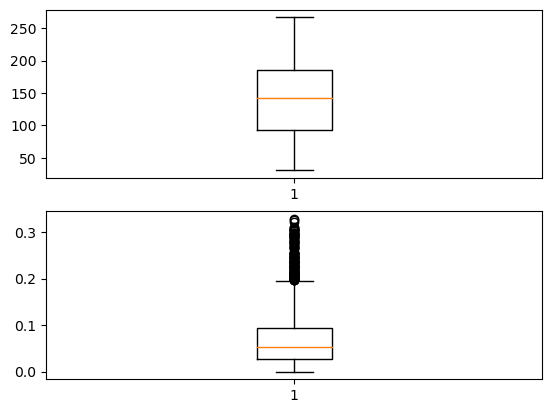

In [14]:
fig, ax = plt.subplots(2, 1)

ax[0].boxplot(train["Item_MRP"])
ax[1].boxplot(train["Item_Visibility"])

plt.show()

There are outliers in our data we can use mean to fill the missing values in Item_Weight column.

# Treating the Missing Values

In [15]:
train["Item_Weight"] = train["Item_Weight"].fillna(train["Item_Weight"].mean())
train["Item_Weight"].isnull().sum()

0

In [16]:
train["Outlet_Size"] = train["Outlet_Size"].fillna(str(train["Outlet_Size"].mode()))
train["Outlet_Size"].isnull().sum()

0

In [17]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Univariate Analysis

array([[<AxesSubplot:title={'center':'Item_Outlet_Sales'}>]], dtype=object)

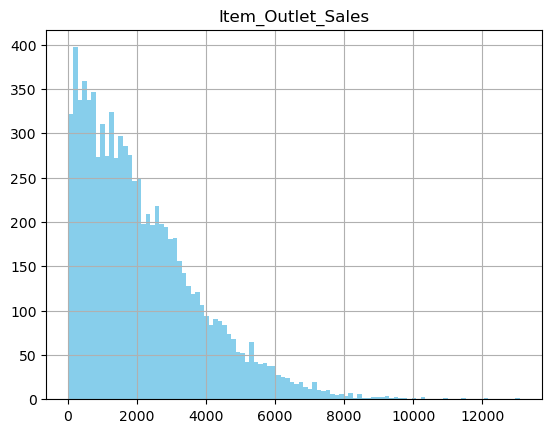

In [18]:
train.hist(column='Item_Outlet_Sales', bins=100, color='skyblue')

array([[<AxesSubplot:title={'center':'Item_MRP'}>]], dtype=object)

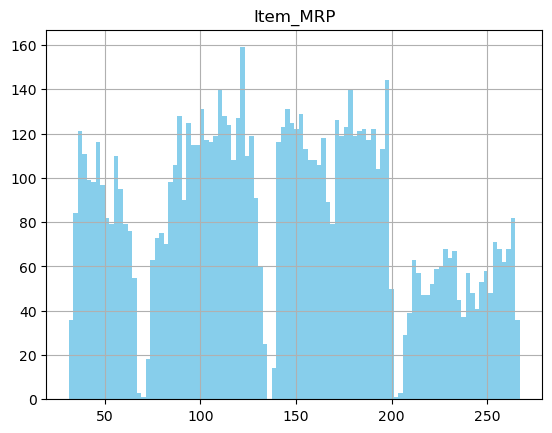

In [19]:
train.hist(column='Item_MRP', bins=100, color='skyblue')

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

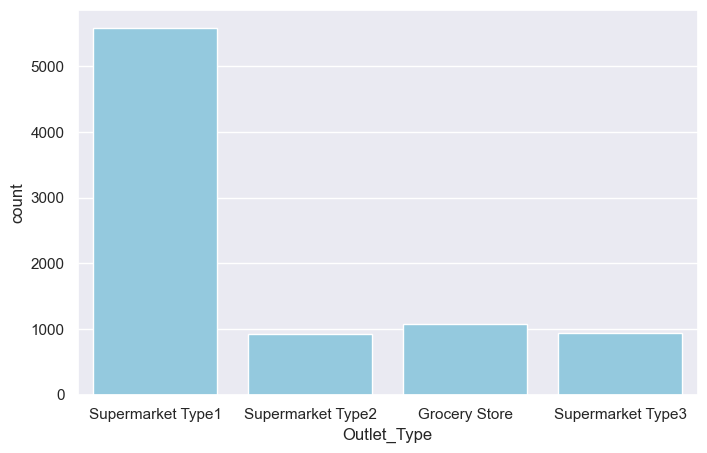

In [20]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x='Outlet_Type', data=train, color='skyblue')

# Feature Engineering

In [21]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
train["Item_Fat_Content"] = train["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

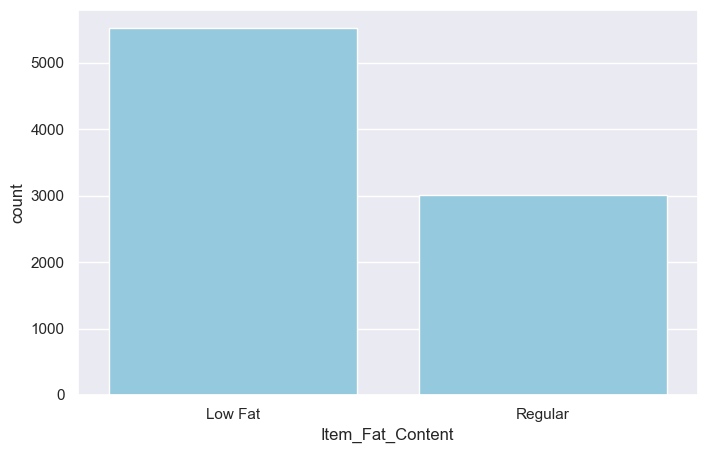

In [23]:
sns.countplot(x='Item_Fat_Content', data=train, color='skyblue')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

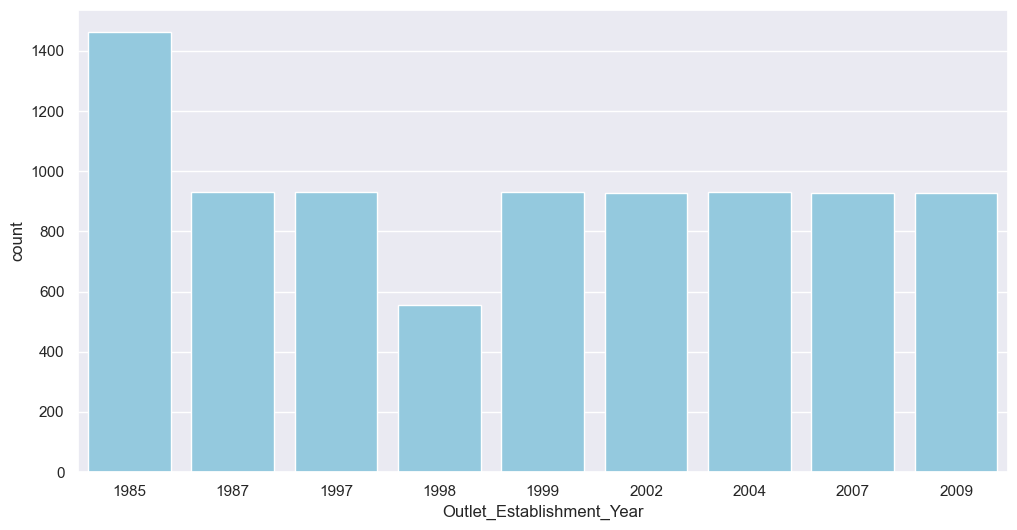

In [24]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Outlet_Establishment_Year', data=train, color='skyblue')

# Bivariate Analysis

We find the dependent and independent variables in the dataset.

In [25]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


Text(0.5, 1.0, 'Relation b/w Item Weight & its Sales at Outlets')

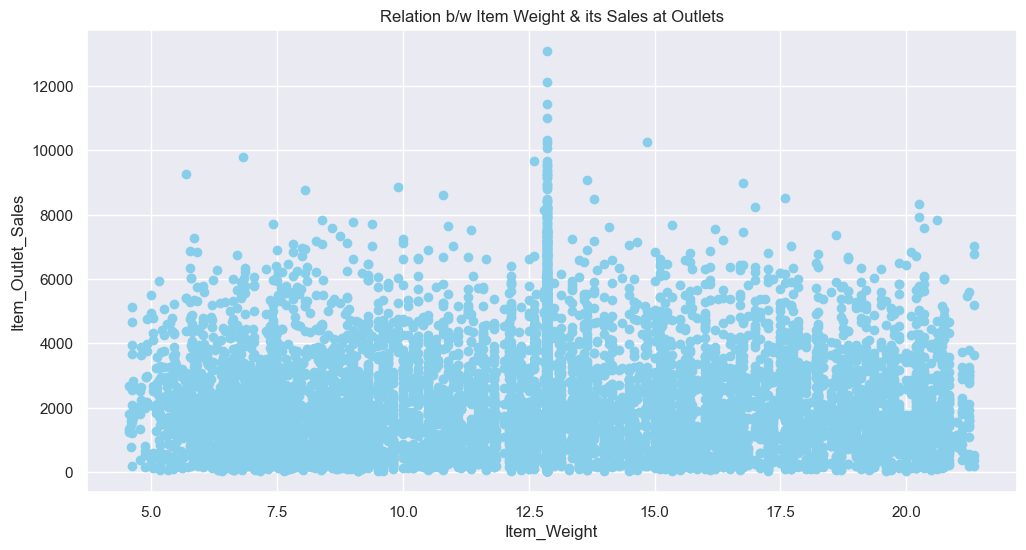

In [26]:
plt.figure(figsize=(12,6))
plt.scatter(train.Item_Weight,train.Item_Outlet_Sales, color='skyblue')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Relation b/w Item Weight & its Sales at Outlets')

There is strong relationship b/w these two columns

Text(0.5, 1.0, 'Relationship b/w Item Visibility & Sales at outlets')

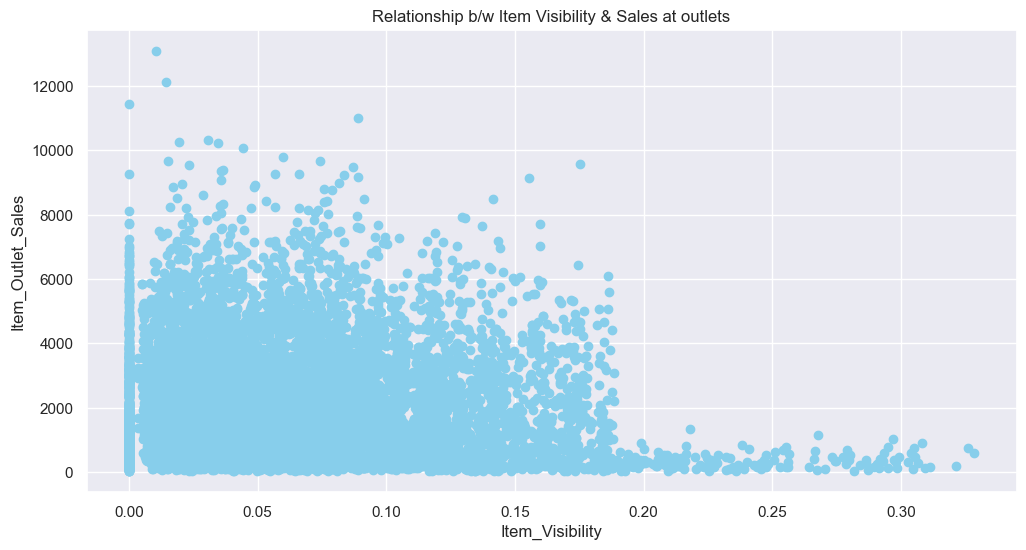

In [27]:
plt.figure(figsize=(12,6))
plt.scatter(train.Item_Visibility,train.Item_Outlet_Sales, color='skyblue')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Relationship b/w Item Visibility & Sales at outlets')

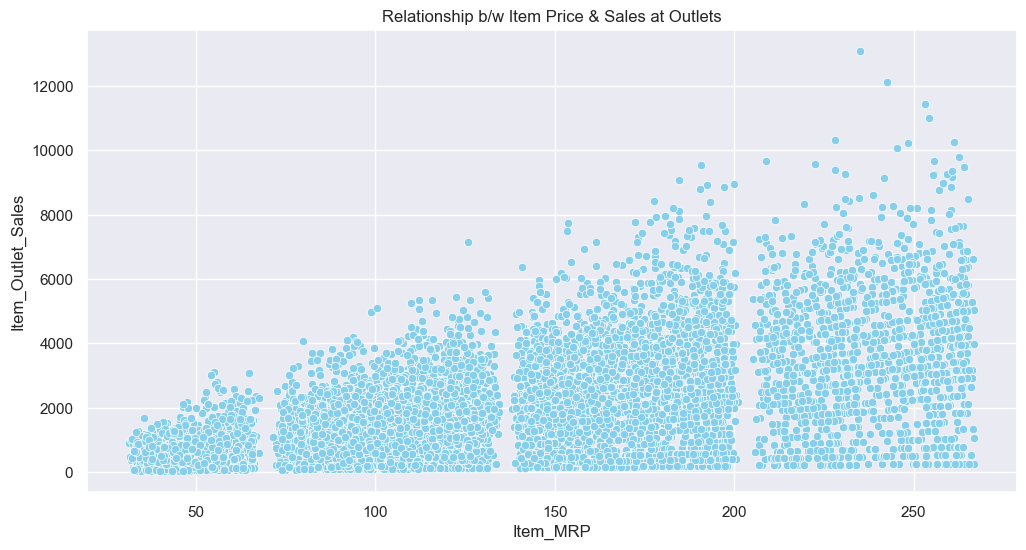

In [28]:
# Create the figure
sns.scatterplot(x=train["Item_MRP"], y=train["Item_Outlet_Sales"], color='skyblue')

# Add labels and title
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.title('Relationship b/w Item Price & Sales at Outlets')

# Show the plot
plt.show()

# Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train['Item_Identifier'] = encoder.fit_transform(train["Item_Identifier"])
train['Item_Fat_Content'] = encoder.fit_transform(train["Item_Fat_Content"])
train['Item_Type'] = encoder.fit_transform(train["Item_Type"])
train['Outlet_Identifier'] = encoder.fit_transform(train["Outlet_Identifier"])
train['Outlet_Size'] = encoder.fit_transform(train["Outlet_Size"])
train['Outlet_Location_Type'] = encoder.fit_transform(train["Outlet_Location_Type"])
train['Outlet_Type'] = encoder.fit_transform(train["Outlet_Type"])

train = train.apply(encoder.fit_transform)

# One Hot Encoding

In [30]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train[categorical_columns])
encoded_cols = list(encoder.get_feature_names(categorical_columns))
train[encoded_cols] = encoder.transform(train[categorical_columns])

C:\Users\afaqu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\afaqu\AppData\Local\Temp\ipykernel_10052\3784347140.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[encoded_cols] = encoder.transform(train[categorical_columns])
C:\Users\afaqu\AppData\Local\Temp\ipykernel_10052\3784347140.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fra

In [31]:
train.isnull().sum()

Item_Identifier           0
Item_Weight               0
Item_Fat_Content          0
Item_Visibility           0
Item_Type                 0
                         ..
Outlet_Location_Type_2    0
Outlet_Type_0             0
Outlet_Type_1             0
Outlet_Type_2             0
Outlet_Type_3             0
Length: 1610, dtype: int64

# Data Pre-processing

In [32]:
x=train
y=x.pop("Item_Outlet_Sales")

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.40, random_state=1)

# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [36]:
pred = reg.predict(x_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
r2 = r2_score(y_test, pred)
print(r2)

-18255049800522.973


In [39]:
mse = mean_squared_error(y_test, pred)
print(mse)

1.563573084930552e+19


# Ridge Regression

In [40]:
from sklearn.linear_model import Ridge
reg2 = Ridge(alpha=1.0)
reg2.fit(x_train, y_train)

predications = reg2.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, predications))

Mean Squared Error: 376961.5342415482


# Lasso Regression

In [41]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

predications = lasso.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, predications))

Mean Squared Error: 360762.11805644684


C:\Users\afaqu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.716e+08, tolerance: 4.264e+05
  model = cd_fast.enet_coordinate_descent(


In [42]:
LS=Lasso(alpha=0.05)
LS.fit(x_train,y_train)

C:\Users\afaqu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.959e+08, tolerance: 4.264e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.05)

In [43]:
LS.score(x_test,y_test)

0.5422120904937897

# ElasticNet Regression

In [44]:
from sklearn.linear_model import ElasticNet
reg_e = ElasticNet(alpha = 0.1, l1_ratio=0.5)
reg_e.fit(x_train, y_train)
predications = reg_e.predict(x_test)
print("Mean Squared Error:", mean_squared_error(y_test, predications))

Mean Squared Error: 325086.19686551276


# Gradient Boosting Regressor

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor(n_estimators = 100)
grad.fit(x_train,y_train)

GradientBoostingRegressor()

In [46]:
grad.score(x_test, y_test)

0.6482414737926043

# Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor(n_estimators = 50)
ran.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [48]:
ran.score(x_test, y_test)

0.6095155323891184

# Summary

Lasso Regression score : 0.54

GradientBoostingRegressor score : 0.65

RandomForestRegressor accuracy : 0.60

Fruits and Vegetables is the most selling Item_Type

Low Fat is the Highest Itrm_Fat_Content

Supermarket Type 1 has the most sales

Strong R/s B/w Item_Weight and Item_Outlet_Sales Linear Regression score : -1.12

Lasso Regression score : 0.54

GradientBoostingRegressor score : 0.65

The fourth model used is RandomForestRegressor accuracy : 0.60